# Linear Regression

Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It is widely used for various purposes, including prediction, forecasting, and understanding the relationships between variables. Linear regression assumes that the relationship between the variables is linear, which means that a change in the independent variables is associated with a proportional change in the dependent variable.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import math

## Simple Linear Regression

In [22]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


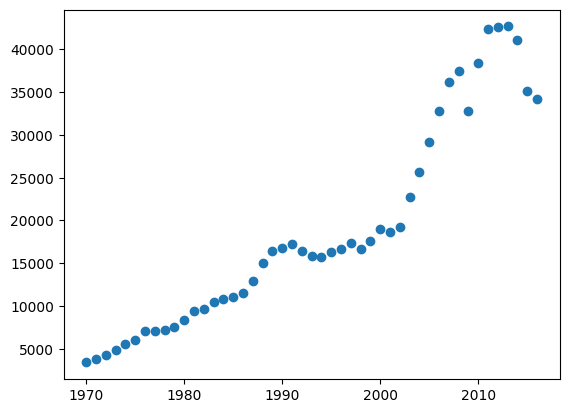

In [23]:
plt.scatter(df.year,df['per capita income (US$)'])

In [24]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df[['per capita income (US$)']])

LinearRegression()

In [25]:
reg.predict([[2020]])

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

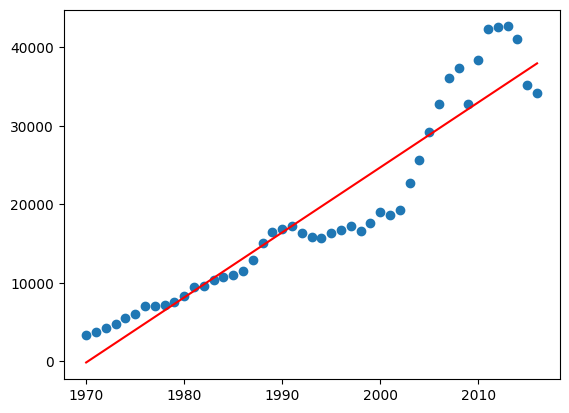

In [26]:
plt.scatter(df.year,df['per capita income (US$)'])
plt.plot(df.year,reg.predict(df[['year']]),'r')

## Multivariate Regresion

In [27]:
from word2number import w2n

In [28]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
df.experience.fillna('zero',inplace=True)
df.experience = df['experience'].apply(lambda x: w2n.word_to_num(x))
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(),inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [30]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])
reg2.predict([[2,9,6]])

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [31]:
reg2.predict([[12,10,10]])

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

## Gradient Descent Algorithm

In [32]:
df = pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


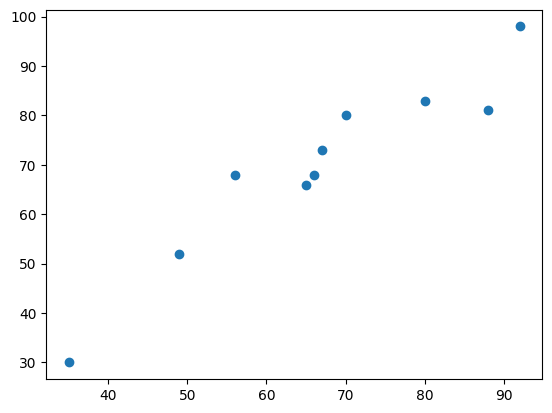

In [33]:
x = np.array(df.math)
y = np.array(df.cs)
plt.scatter(df.math,df.cs)

[1.01773624]
1.9152193111568891


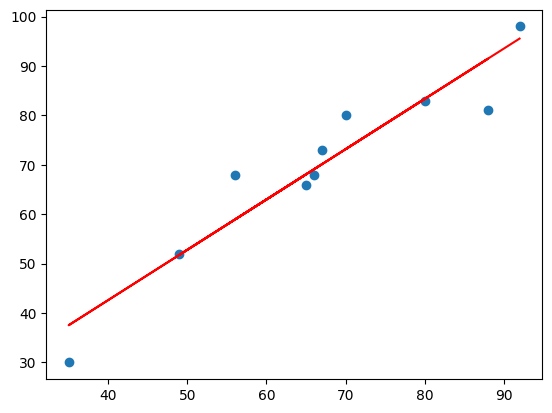

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df[['math']],y)
plt.scatter(x,y)
plt.plot(df.math,reg.predict(df[['math']]),'r')
print(reg.coef_)
print(reg.intercept_)

In [35]:
def gradient_descent(x,y,iterations=1000,learning_rate=0.01):
    slope_curr = intercept_curr = 0
    n = len(x)

    for i in range(iterations):
        y_predicted = slope_curr * x + intercept_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        slope_d = -(2/n) * np.sum(x*(y-y_predicted))
        intercept_d = -(2/n) * np.sum(y-y_predicted)
        slope_curr -= learning_rate * slope_d
        intercept_curr -= learning_rate * intercept_d
    print('m:',slope_curr,'b:',intercept_curr,'cost',cost)
    return slope_curr, intercept_curr

In [36]:
m,b = gradient_descent(x,y,learning_rate=0.00001)

m: 1.0445228753340983 b: 0.01691984395127578 cost 31.811376672923775


In [37]:
print(reg.predict([[90]]))
print(m*90+b)
print(reg.coef_*90+reg.intercept_)

[93.51148072]
94.02397862402012
[93.51148072]


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Dummy Variable and One Hot Encoding

In [ ]:
df = pd.read_csv('Datasets/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### Without using One Hot Encoder

In [ ]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [ ]:
df1 = pd.concat([dummies,df], axis=1)
df1

,Audi A5,BMW X5,Mercedez Benz C class,Car Model,Mileage,Sell Price($),Age(yrs)
0,False,True,False,BMW X5,69000,18000,6
1,False,True,False,BMW X5,35000,34000,3
2,False,True,False,BMW X5,57000,26100,5
3,False,True,False,BMW X5,22500,40000,2
4,False,True,False,BMW X5,46000,31500,4
5,True,False,False,Audi A5,59000,29400,5
6,True,False,False,Audi A5,52000,32000,5
7,True,False,False,Audi A5,72000,19300,6
8,True,False,False,Audi A5,91000,12000,8
9,False,False,True,Mercedez Benz C class,67000,22000,6


In [ ]:
df1.drop(['Mercedez Benz C class','Car Model'],axis=1,inplace=True)
df1

,Audi A5,BMW X5,Mileage,Sell Price($),Age(yrs)
0,False,True,69000,18000,6
1,False,True,35000,34000,3
2,False,True,57000,26100,5
3,False,True,22500,40000,2
4,False,True,46000,31500,4
5,True,False,59000,29400,5
6,True,False,52000,32000,5
7,True,False,72000,19300,6
8,True,False,91000,12000,8
9,False,False,67000,22000,6


In [ ]:
df1_model = linear_model.LinearRegression()
x = df1[['Audi A5','BMW X5','Mileage','Age(yrs)']]
y = df1['Sell Price($)']
df1_model.fit(x,y)

LinearRegression()

In [ ]:
x.columns

Index(['Audi A5', 'BMW X5', 'Mileage', 'Age(yrs)'], dtype='object')

In [ ]:
df1_model.predict([[False,False,45000,4]]) # predict price of mercedez benz C class that is 4 y.o and 45000 mileage

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

### Using One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform((df[['Car Model']])).toarray()
feature_labels = list(ohe.categories_)
feature = pd.DataFrame(feature_arr,columns=feature_labels)
df2 = pd.concat([feature,df],axis=1)
df2.drop('Car Model',axis=1,inplace=True)
df2

,"(Audi A5,)","(BMW X5,)","(Mercedez Benz C class,)",Mileage,Sell Price($),Age(yrs)
0,0.0,1.0,0.0,69000,18000,6
1,0.0,1.0,0.0,35000,34000,3
2,0.0,1.0,0.0,57000,26100,5
3,0.0,1.0,0.0,22500,40000,2
4,0.0,1.0,0.0,46000,31500,4
5,1.0,0.0,0.0,59000,29400,5
6,1.0,0.0,0.0,52000,32000,5
7,1.0,0.0,0.0,72000,19300,6
8,1.0,0.0,0.0,91000,12000,8
9,0.0,0.0,1.0,67000,22000,6


## Train and Test method

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_test = df.drop('Car Model',axis=1)
df_train_test

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['Mileage','Age(yrs)']],df['Sell Price($)'],test_size=0.2)
x_train

,Mileage,Age(yrs)
3,22500,2
9,67000,6
0,69000,6
1,35000,3
6,52000,5
10,83000,7
7,72000,6
8,91000,8
2,57000,5
5,59000,5


In [ ]:
y_train

3     40000
9     22000
0     18000
1     34000
6     32000
10    20000
7     19300
8     12000
2     26100
5     29400
Name: Sell Price($), dtype: int64

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
print(y_test)
print(model.predict(x_test))
print(model.score(x_test,y_test))


4     31500
12    33000
11    21000
Name: Sell Price($), dtype: int64
[31028.25696469 25764.34623466 18291.85589372]
0.2992833753966663


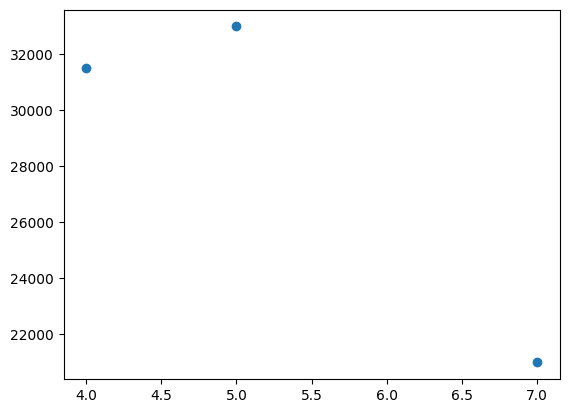

In [ ]:
plt.scatter(x_test['Age(yrs)'],y_test)